In [13]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns

##### Please Enter your api key below before using the code

In [14]:
api_key = 'Enter your api key here'

channel_ids = [ # Some Educational Channels
               'UCF7BExjT2zH_mmyqOB139Dg', # Apni Kaksha
               'UCVJU_IChPMOe8RWkdVQjtfQ', # JEE Wallah 
               'UC7btqG2Ww0_2LwuQxpvo2HQ', # ProgrammingWithHarry 
               'UCVtL0esgwmD3bEZ2iNUjzHw', # Apni Kaksha NEET
               'UCmXZxX_qexEZxhb5_vQKPCw', # Aman Dhattarwal 

               # Some Entertainment Channels
               'UCdxbhKxr8pyWTx1ExCSmJRw', # Girliyapa
               'UCCKjHsAIxvjtWG8KOcLuG8Q', # Alright!
               'UCgM1AQcoM5TRlzsm1e66vrQ', # Hasley India
               'UCNJcSUSzUeFm8W9P7UUlSeQ', # The Viral Fever
               'UCNyeSfUfffmJXwA2_tmNG9A', # The Screen Patti

               # Some Tech Channels
               'UCXUJJNoP1QupwsYIWFXmsZg', # Tech Burner 
               'UCaSM4GqhbaVmRT7fmmFmR1w', # TechGumbo 
               'UCXuqSBlHAE6Xw-yeJA0Tunw', # Linus Tech Tips 
               'UCEPL07qzVsOcHd3sMUws65g', # Trakin Tech 
               'UC1tVU8H153ZFO9eRsxdJlhA', # Technology Gyan 

               # Some Motivational Channels
               'UCBqFKDipsnzvJdt6UT0lMIg', # Sandeep Maheshwari 
               'UCR54lF_dD3f-8srmRqnTwgQ', # MotivationHub 
               'UClbqFnwW_1qjWwO2zl0ggvw', # Harshvardhan Jain 
               'UCjGp9cTDDWYvjTO67H4-6AQ', # Outcast Motivation
               'UC9vLdyHatOhRrCwQXq3HmQQ' # Motivation Ark 
              ]
channel_ids2 = [

]
youtube = build('youtube', 'v3', developerKey=api_key)

## Function to get channel stats


In [15]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(
                part='snippet,contentDetails,statistics',
                id=','.join(channel_ids))
    response = request.execute() 
    
    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                    Subscribers = response['items'][i]['statistics']['subscriberCount'],
                    Views = response['items'][i]['statistics']['viewCount'],
                    Total_videos = response['items'][i]['statistics']['videoCount'],
                    playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)
    
    return all_data

In [16]:
channel_statistics = get_channel_stats(youtube, channel_ids)

In [17]:
channel_data = pd.DataFrame(channel_statistics)

In [18]:
channel_data = pd.DataFrame(channel_statistics)

In [19]:
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_videos'] = pd.to_numeric(channel_data['Total_videos'])
channel_data.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
playlist_id     object
dtype: object

Graph between channel and their subscribers

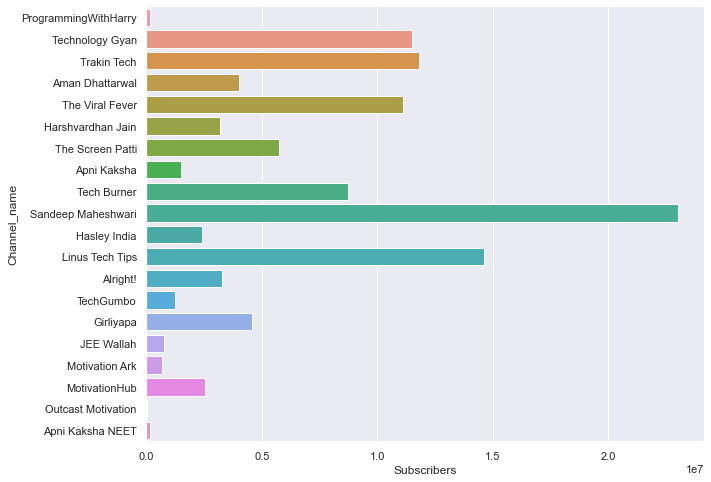

In [20]:
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.barplot(x='Subscribers', y='Channel_name', data=channel_data)

Graph between channel and their views

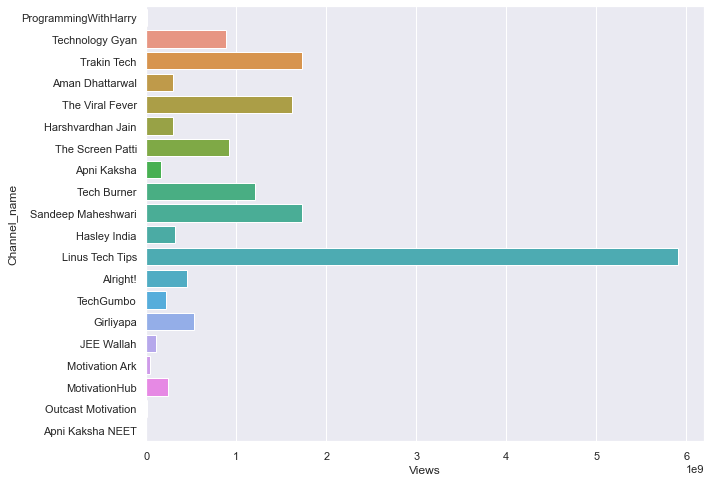

In [21]:
ax = sns.barplot(x='Views', y='Channel_name', data=channel_data)

Graph between channel and their total number of videos

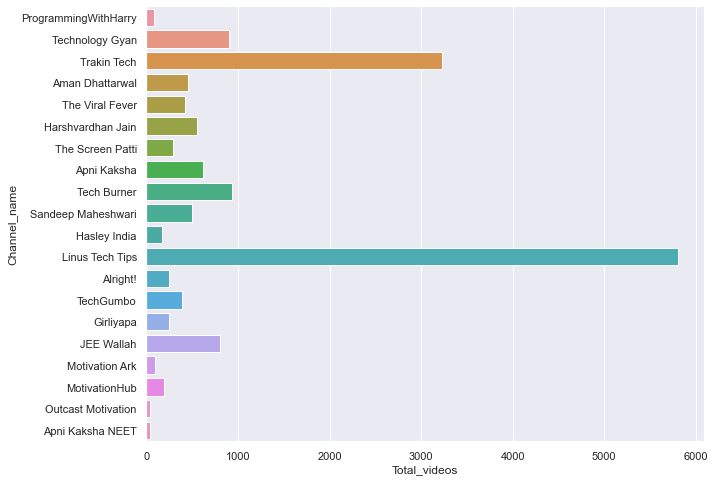

In [22]:
ax = sns.barplot(x='Total_videos', y='Channel_name', data=channel_data)

In [23]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,ProgrammingWithHarry,169000,3522009,80,UU7btqG2Ww0_2LwuQxpvo2HQ
1,Technology Gyan,11500000,881282928,908,UU1tVU8H153ZFO9eRsxdJlhA
2,Trakin Tech,11800000,1733067767,3232,UUEPL07qzVsOcHd3sMUws65g
3,Aman Dhattarwal,4000000,300366179,452,UUmXZxX_qexEZxhb5_vQKPCw
4,The Viral Fever,11100000,1618195705,424,UUNJcSUSzUeFm8W9P7UUlSeQ
5,Harshvardhan Jain,3210000,297186189,553,UUlbqFnwW_1qjWwO2zl0ggvw
6,The Screen Patti,5730000,916003434,288,UUNyeSfUfffmJXwA2_tmNG9A
7,Apni Kaksha,1480000,167579090,614,UUF7BExjT2zH_mmyqOB139Dg
8,Tech Burner,8740000,1203888065,938,UUXUJJNoP1QupwsYIWFXmsZg
9,Sandeep Maheshwari,23000000,1728289740,495,UUBqFKDipsnzvJdt6UT0lMIg


Enter the channel name below to use work on required channel

In [24]:
playlist_id = channel_data.loc[channel_data['Channel_name']=='JEE Wallah', 'playlist_id'].iloc[0]

In [25]:
def get_video_ids(youtube, playlist_id):
    
    request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId = playlist_id,
                maxResults = 50)
    response = request.execute()
    
    video_ids = []
    
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                        part='contentDetails',
                        playlistId = playlist_id,
                        maxResults = 50,
                        pageToken = next_page_token)
            response = request.execute()
    
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            
            next_page_token = response.get('nextPageToken')
        
    return video_ids

In [26]:
video_ids = get_video_ids(youtube, playlist_id)

List of video ids

In [27]:
video_ids

['LuVAUFelzus',
 'Zut1da_3Sc0',
 'VoNgfysJyOY',
 'SmpZdAYMW34',
 'HHbpZf5tLYk',
 'jdaLTDMmKQg',
 'rjZWx5cW5yA',
 'uzWcFQ7cMAg',
 'xipdasswvC8',
 'Fqm3ObKpoNA',
 'WIg6JJE4Mic',
 'DfB6JQ8weHc',
 '1t0zqmfqL3s',
 'rvs-ZW93isM',
 'Rw-ZTuBRU8o',
 '6jAIEf3rHBk',
 'CJr13R8_UDo',
 'YtEtJxQ1O68',
 'OajY0s_4iJU',
 '_-f8i5Tnhw8',
 '30CtzJ4joEA',
 'P0_W-_Pofzw',
 'vydDwgb7bHc',
 'eR9CYYx8ots',
 'H8YybnAnI3E',
 'wK0r2dCbpvM',
 'bSJzGn8pQvA',
 'Ht0GpMTht-Y',
 'xbaLUHjPsRw',
 'bO1Uz9E-nlI',
 'r87Nbs7KuTQ',
 'z8F45RH-79M',
 'ZpQtsWZUYK4',
 'efcP0Y1aDW0',
 'kcpC9qpDjOY',
 'y5eTm1SkNt4',
 'i_OLuqtHqgQ',
 '2S6AUTzPCaU',
 'FdiOQGvAuuU',
 '53J7nbLtTnQ',
 'P2AJSY0wEWo',
 'mbNRA9oIYQg',
 'FfRmhuVS57A',
 'kw12nrsktnc',
 'B8hRvuAOaYU',
 '-bC5Pyv7KLI',
 'bIF0Fmq94Gw',
 '6yY0Fxwybtc',
 'Nf0H6ROeCx0',
 'iPOxMOCOIpY',
 'YqaaYsckvF8',
 '-MkCBJ9uMvc',
 'tkDkeopn8JE',
 'bl-hlgQlM90',
 'EpYK9kdKxIk',
 'stgqsc2sIZ8',
 'kOQ0TQXurxY',
 'y9wwx5NjWnQ',
 'TjCWDGenZ10',
 'urEsdx9xfKI',
 '9Zio8pPGiOQ',
 'P15MmCK0alI',
 '9suEN7

## Function to get video details

In [28]:
def get_video_details(youtube, video_ids):
    all_video_stats = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
                    part='snippet,statistics',
                    id=','.join(video_ids[i:i+50]))
        response = request.execute()
        
        for video in response['items']:
            video_stats = dict(Title = video['snippet']['title'],
                               Published_date = video['snippet']['publishedAt'],
                               Views = video['statistics']['viewCount'],
                               Likes = video['statistics']['likeCount'],
                               Favorite = video['statistics']['favoriteCount'],
                               Comments = video['statistics']['commentCount']
                               )
            all_video_stats.append(video_stats)
            
    
    return all_video_stats

In [29]:
video_details = get_video_details(youtube, video_ids)

In [30]:
video_data = pd.DataFrame(video_details)

In [31]:
video_data['Published_date'] = pd.to_datetime(video_data['Published_date']).dt.date
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data['Likes'] = pd.to_numeric(video_data['Likes'])
video_data['Favorite'] = pd.to_numeric(video_data['Favorite'])
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data

,Title,Published_date,Views,Likes,Favorite,Comments
0,IIT Ka EXAM Tough Nahi Hota !!!,2022-06-24,17666,4951,0,54
1,PW Ka Price REVOLUTION 🔥,2022-06-24,36183,4858,0,139
2,Jharkhand Topper from PW 🔥,2022-06-23,108301,11787,0,224
3,"""Success"" ही ""Respect"" देता है!!",2022-06-23,23558,3043,0,32
4,"""समय"" Ki Importance Samjho 🤗",2022-06-23,26588,4059,0,44
...,...,...,...,...,...,...
795,"Quadratic Equations in 1 Shot - All Concepts, ...",2021-06-02,1559876,51109,0,4597
796,"Basic Mathematics in 1 Shot - All Concepts, Tr...",2021-06-01,709916,32848,0,1165
797,"Mole Concept in 1 Shot - Every Concepts, Trick...",2021-05-30,2297039,70883,0,3966
798,MANZIL Batch - Complete VECTORS in 1 Shot | Day 1,2021-05-28,1499291,61090,0,3526


In [32]:
top10_videos = video_data.sort_values(by='Views', ascending=False).head(10)

In [33]:
top10_videos

,Title,Published_date,Views,Likes,Favorite,Comments
81,Alakh Sir ने कितने लोगों को रोजगार दिया है? SI...,2022-06-05,3204378,311246,0,680
797,"Mole Concept in 1 Shot - Every Concepts, Trick...",2021-05-30,2297039,70883,0,3966
790,"Atomic Structure in 1 Shot - All Concepts, Tri...",2021-06-06,1955676,60880,0,2920
695,Complete ORGANIC CHEMISTRY in 6 Hours - Best R...,2021-07-21,1837206,55286,0,2843
185,Alakh sir SECRET Suggestion🤫,2022-04-28,1782033,188536,0,365
158,Bachpan की Maths 😂,2022-05-15,1609466,118858,0,909
795,"Quadratic Equations in 1 Shot - All Concepts, ...",2021-06-02,1559876,51109,0,4597
152,"""Mehfil"" खुद की, चर्चे हमारे😂",2022-05-17,1506467,138865,0,203
798,MANZIL Batch - Complete VECTORS in 1 Shot | Day 1,2021-05-28,1499291,61090,0,3526
791,"Complex Numbers in 1 Shot - All Concepts, Tric...",2021-06-05,1332028,45929,0,2509


Number of views on top videos of selected channel

c:\Users\rajha\.conda\envs\YT-env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\rajha\.conda\envs\YT-env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\rajha\.conda\envs\YT-env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2375 (\N{DEVANAGARI VOWEL SIGN E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\rajha\.conda\envs\YT-env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\rajha\.conda\envs\YT-env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2367 (\N{DEVANAGARI VOWEL SIGN I}) missing from current font.
  fig.canvas.print_fig

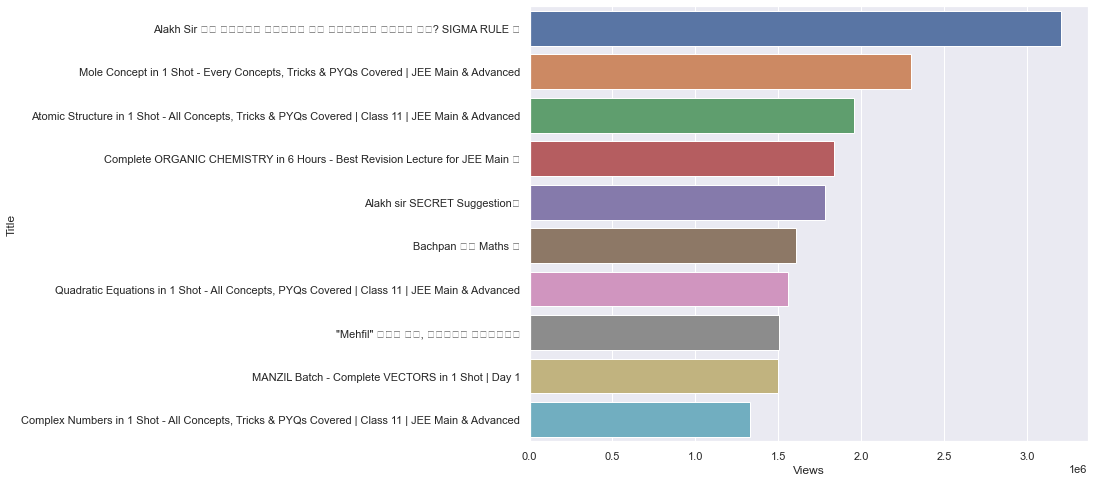

In [34]:
ax1 = sns.barplot(x='Views', y='Title', data=top10_videos)

In [35]:
video_data

,Title,Published_date,Views,Likes,Favorite,Comments
0,IIT Ka EXAM Tough Nahi Hota !!!,2022-06-24,17666,4951,0,54
1,PW Ka Price REVOLUTION 🔥,2022-06-24,36183,4858,0,139
2,Jharkhand Topper from PW 🔥,2022-06-23,108301,11787,0,224
3,"""Success"" ही ""Respect"" देता है!!",2022-06-23,23558,3043,0,32
4,"""समय"" Ki Importance Samjho 🤗",2022-06-23,26588,4059,0,44
...,...,...,...,...,...,...
795,"Quadratic Equations in 1 Shot - All Concepts, ...",2021-06-02,1559876,51109,0,4597
796,"Basic Mathematics in 1 Shot - All Concepts, Tr...",2021-06-01,709916,32848,0,1165
797,"Mole Concept in 1 Shot - Every Concepts, Trick...",2021-05-30,2297039,70883,0,3966
798,MANZIL Batch - Complete VECTORS in 1 Shot | Day 1,2021-05-28,1499291,61090,0,3526


In [36]:
video_data['Month'] = pd.to_datetime(video_data['Published_date']).dt.strftime('%b')

In [37]:
video_data

,Title,Published_date,Views,Likes,Favorite,Comments,Month
0,IIT Ka EXAM Tough Nahi Hota !!!,2022-06-24,17666,4951,0,54,Jun
1,PW Ka Price REVOLUTION 🔥,2022-06-24,36183,4858,0,139,Jun
2,Jharkhand Topper from PW 🔥,2022-06-23,108301,11787,0,224,Jun
3,"""Success"" ही ""Respect"" देता है!!",2022-06-23,23558,3043,0,32,Jun
4,"""समय"" Ki Importance Samjho 🤗",2022-06-23,26588,4059,0,44,Jun
...,...,...,...,...,...,...,...
795,"Quadratic Equations in 1 Shot - All Concepts, ...",2021-06-02,1559876,51109,0,4597,Jun
796,"Basic Mathematics in 1 Shot - All Concepts, Tr...",2021-06-01,709916,32848,0,1165,Jun
797,"Mole Concept in 1 Shot - Every Concepts, Trick...",2021-05-30,2297039,70883,0,3966,May
798,MANZIL Batch - Complete VECTORS in 1 Shot | Day 1,2021-05-28,1499291,61090,0,3526,May


In [38]:
videos_per_month = video_data.groupby('Month', as_index=False).size()

In [39]:
videos_per_month

,Month,size
0,Apr,39
1,Aug,18
2,Dec,94
3,Feb,95
4,Jan,90
5,Jul,80
6,Jun,131
7,Mar,57
8,May,80
9,Nov,80


In [40]:
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [41]:
videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'], categories=sort_order, ordered=True)

In [42]:
videos_per_month = videos_per_month.sort_index()

Number of videos uploded petr month

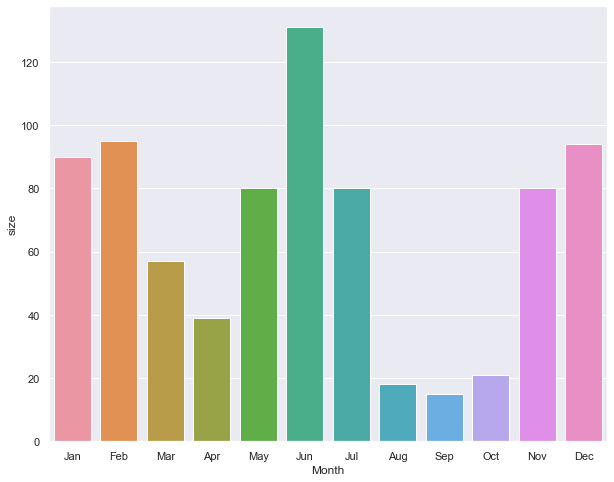

In [43]:
ax2 = sns.barplot(x='Month', y='size', data=videos_per_month)

Creating csv file of list of all videos

In [44]:
video_data.to_csv('Video_Details(JEE Wallah).csv')